### Предупреждение.

Этот ноутбук, а именно модуль tkinter, не будет работать в Google.Colab. Я использую вывод на экран, а так как Google.Colab работает в облаке, он выполнить эту операцию не способен. Пожалуйста сохраните ноутбук на компьютер и откройте с помощью стандартного JupiterNotebook. Благодарю за проверку.

In [88]:
# прошу прощения, тут есть лишние, я не знал как далеко зайду в экспериментах)
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential # class of model
from tensorflow.keras.layers import Dense # fullconnected layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image # for add image
import numpy as np
import pandas as pd
import seaborn as sns
import pylab
#from google.colab import files
import matplotlib.pyplot as plt
import random
import PIL.ImageOps    
from PIL import ImageDraw
from PIL import Image as IMG
%matplotlib inline

### Part 1.

Подготовим нейронную сеть, с лучшими параметрами, которые удалось получить в Light версии ДЗ.

In [110]:
# подготовим данные

(x_train, y_train_org), (x_test, y_test_org) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [49]:
# посчитаем веса, так как там мои нейронки считались в цикле, веса я не сохранил.
model = Sequential()
model.add(Dense(800, input_dim = 784, activation='relu'))
model.add(Dense(100, activation='linear'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=768, epochs=90, verbose=1)
res_base = model.evaluate(x_test, y_test, verbose=1)

Epoch 1/90
79/79 [==============================] - 7s 84ms/step - loss: 0.3803 - accuracy: 0.8885
Epoch 2/90
79/79 [==============================] - 8s 95ms/step - loss: 0.1394 - accuracy: 0.9600
Epoch 3/90
79/79 [==============================] - 8s 99ms/step - loss: 0.0901 - accuracy: 0.9743
Epoch 4/90
79/79 [==============================] - 7s 92ms/step - loss: 0.0632 - accuracy: 0.9818
Epoch 5/90
79/79 [==============================] - 9s 113ms/step - loss: 0.0473 - accuracy: 0.9866
Epoch 6/90
79/79 [==============================] - 7s 95ms/step - loss: 0.0341 - accuracy: 0.9905
Epoch 7/90
79/79 [==============================] - 7s 92ms/step - loss: 0.0245 - accuracy: 0.9937
Epoch 8/90
79/79 [==============================] - 8s 101ms/step - loss: 0.0178 - accuracy: 0.9956
Epoch 9/90
79/79 [==============================] - 9s 114ms/step - loss: 0.0142 - accuracy: 0.9966
Epoch 10/90
79/79 [==============================] - 9s 118ms/step - loss: 0.0126 - accuracy: 0.9969
Epoch

Epoch 80/90
79/79 [==============================] - 9s 110ms/step - loss: 1.1097e-05 - accuracy: 1.0000
Epoch 81/90
79/79 [==============================] - 9s 113ms/step - loss: 1.0645e-05 - accuracy: 1.0000
Epoch 82/90
79/79 [==============================] - 8s 104ms/step - loss: 1.0087e-05 - accuracy: 1.0000
Epoch 83/90
79/79 [==============================] - 9s 108ms/step - loss: 9.5913e-06 - accuracy: 1.0000
Epoch 84/90
79/79 [==============================] - 8s 100ms/step - loss: 9.1304e-06 - accuracy: 1.0000
Epoch 85/90
79/79 [==============================] - 9s 108ms/step - loss: 8.7500e-06 - accuracy: 1.0000
Epoch 86/90
79/79 [==============================] - 8s 105ms/step - loss: 8.3044e-06 - accuracy: 1.0000
Epoch 87/90
79/79 [==============================] - 9s 114ms/step - loss: 7.9132e-06 - accuracy: 1.0000
Epoch 88/90
79/79 [==============================] - 9s 114ms/step - loss: 7.6032e-06 - accuracy: 1.0000
Epoch 89/90
79/79 [==============================] - 9s

In [53]:
# сохраним модель и веса
weights = model.get_weights()
np.save('weights', weights)
model.save("mnist_number.h5")

Сделаем Paint картинку и попросим нашу нейросеть сделать предсказание.

In [87]:
# Зачем использовать "Paint", если Питон позволяет быстро написать свой собственный "Paint" с блэ..
# С теми функциями, что нам нужны))

from tkinter import *
#from PIL import Image, ImageTk, ImageGrab  # For Windows & OSx
import pyscreenshot as ImageGrab # For Linux
from tkinter import messagebox as mb
 
class Paint(Frame):
    
    '''
    Это маленькая программка, всего с одной возможностью и двумя кнопочками.
    Но интересная! =)))
    Вы можете нарисовать любую римскую цифру и моя нейросеть попробует ее распознать.
    Рекомендуем писать единичку палочкой и все цифры без наклона.
    Этим правилам следует западная культура написания цифр, 
    а именно на ней нейроночка и училась.
    Также убедитесь, что ваши цифры нарисованы без разрывов.
    
    Если рисовать цифры без особых изысков и в западной манере, 
    то доля успешного распознавания превышает 95%.
    Если что-то работает неправильно, или у вас есть идеи или предложения ко мне,
    прошу писать на почту DoroninDobro@gmail.com
    
    Интструкция:
    Кнопка "Clear all" очищает экран, если рисунок получился не таким, как вы хотели.
    Кнопка "What is the Number?" отправляет картинку нейронной сети.
    '''
    def __init__(self, parent):
         Frame.__init__(self, parent)
         self.parent = parent
         self.setUI()
         self.brush_size = 14
         self.brush_color = "white"
            
    def w_n(self):
        self._snapsaveCanvas()
        number = IMG.open('out_snapsave.jpg')
        number = number.resize([28,28])
        number = number.convert('L')
        number = image.img_to_array(number)
        number = number.reshape(1, 784)
        prediction = model.predict(number)
        predict = np.argmax(prediction)
        mb.showinfo("Приходи еще! =)", f"Я думаю это число: {predict}")
            
    def _snapsaveCanvas(self):        
        self.grabcanvas = ImageGrab.grab(bbox=(406,211,793,590)).save("out_snapsave.jpg")        
        
    def setUI(self):            
         
        self.parent.title("Нарисуй цифру")  # Устанавливаем название окна
        self.pack(fill=BOTH, expand=1)  # Размещаем активные элементы на родительском окне
 
        self.canv = Canvas(self, bg="black", height=387, width=387)  
        # Создаем поле для рисования, устанавливаем black фон
        self.canv.grid(row=2, column=0, columnspan=2, padx=5, pady=5)
        self.canv.bind("<B1-Motion>", self.draw)
        
        clear_btn = Button(self, text="Clear all", width=10, 
                           command=lambda: self.canv.delete("all"))
        clear_btn.grid(row=0, column=0, sticky=W)
        
        clear_btn = Button(self, text="What is the Number?", width=35, 
                           command=self.w_n)
        clear_btn.grid(row=0, column=1, sticky=W)
        
    def draw(self, event):
        self.canv.create_oval(event.x - self.brush_size,
                          event.y - self.brush_size,
                          event.x + self.brush_size,
                          event.y + self.brush_size,
                          fill=self.brush_color, outline=self.brush_color)
        
 
 
def main():
    root = Tk()
    root.geometry("399x423+400+150")
    app = Paint(root)
    root.mainloop()
 
if __name__ == "__main__":
    main()

### Part 2.

С Paint разобрались, теперь попробуем загрузить цифру нарисованную от руки. Я намеренно старался использовать навыки библиотеки PIL, потому что это более универсально и навыки ее пользования пригодятся мне в будущем. Идея с инвертацией вычитанием -255 мне ясна.

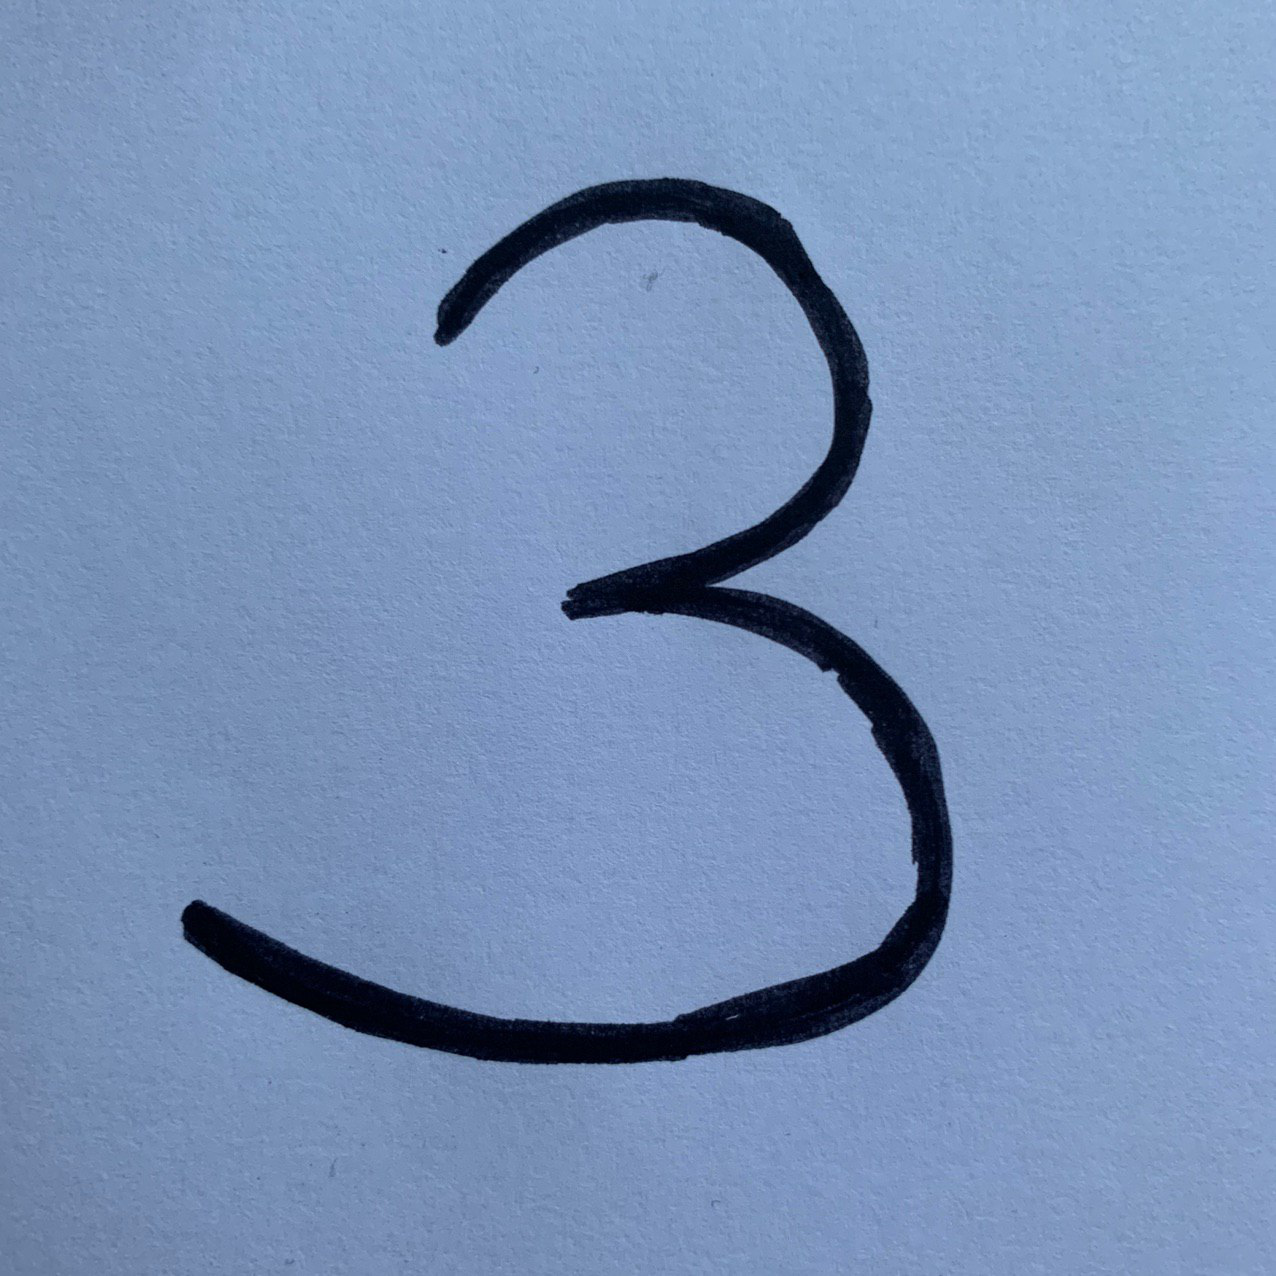

In [43]:
three = IMG.open('mnist_three.jpg')
three

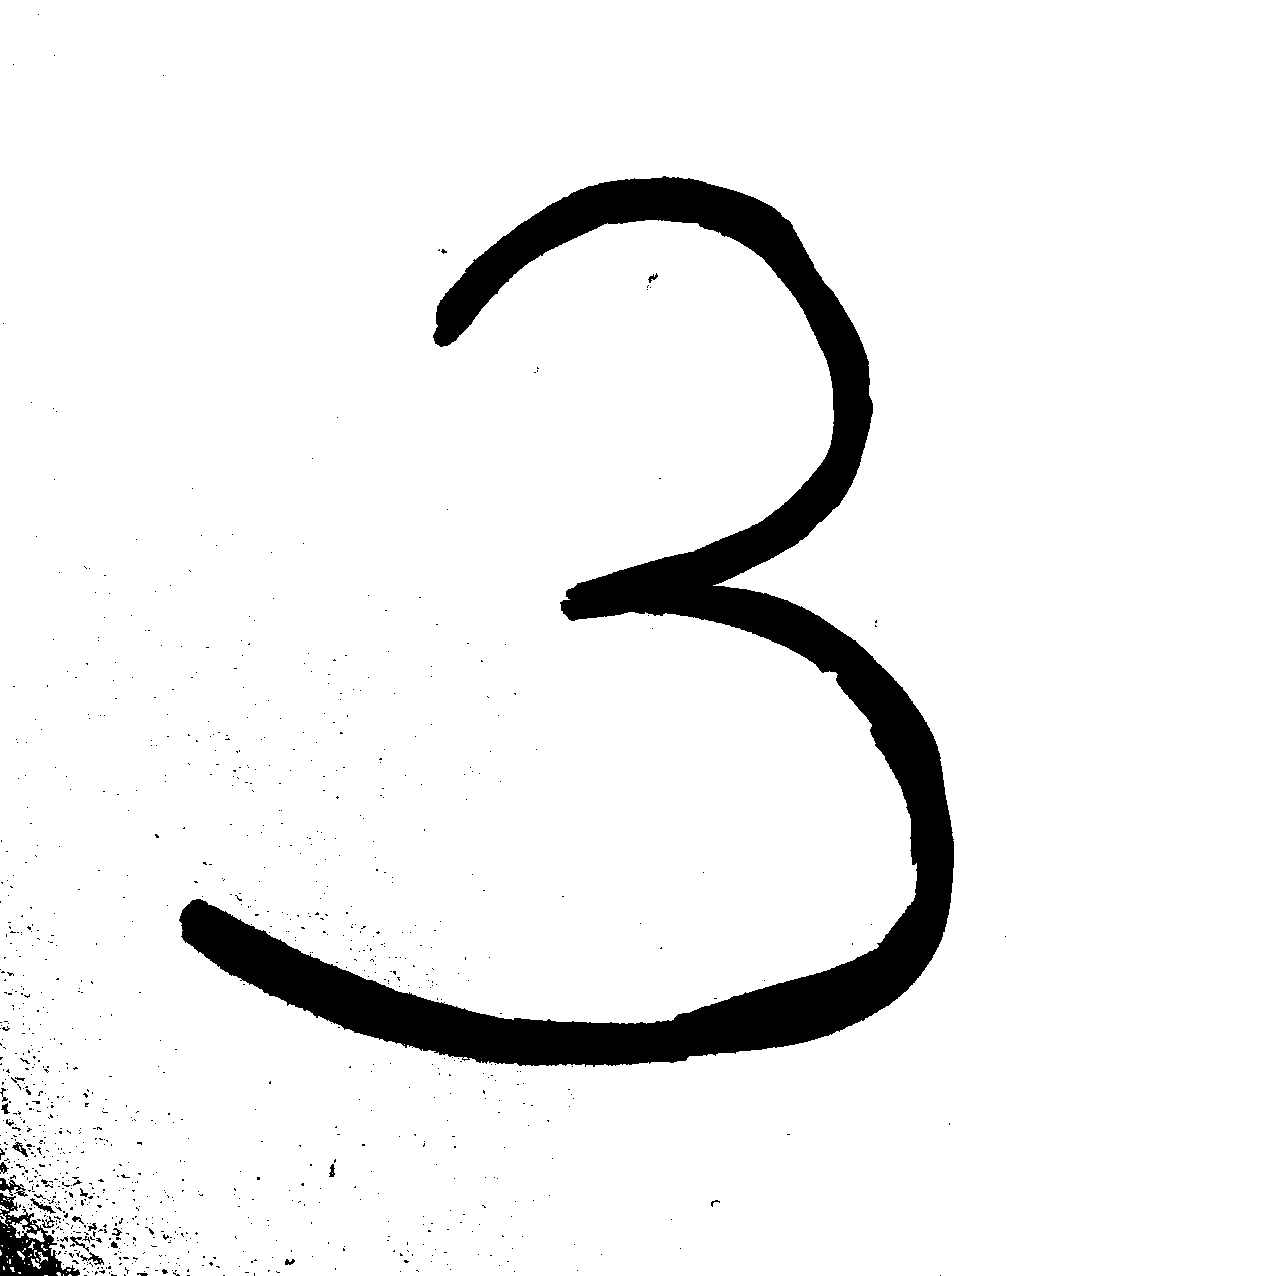

In [44]:
# Переводим картинку в черно-белый формат.

draw = ImageDraw.Draw(three) #Создаем инструмент для рисования. 
width = three.size[0] #Определяем ширину. 
height = three.size[1] #Определяем высоту. 	
pix = three.load() #Выгружаем значения пикселей.
factor = 10

for i in range(width):
    for j in range(height):
        a = pix[i, j][0]
        b = pix[i, j][1]
        c = pix[i, j][2]
        S = a + b + c
        if (S > (((255 + factor) // 2) * 3)):
            a, b, c = 255, 255, 255
        else:
            a, b, c = 0, 0, 0
        draw.point((i, j), (a, b, c))
        
three

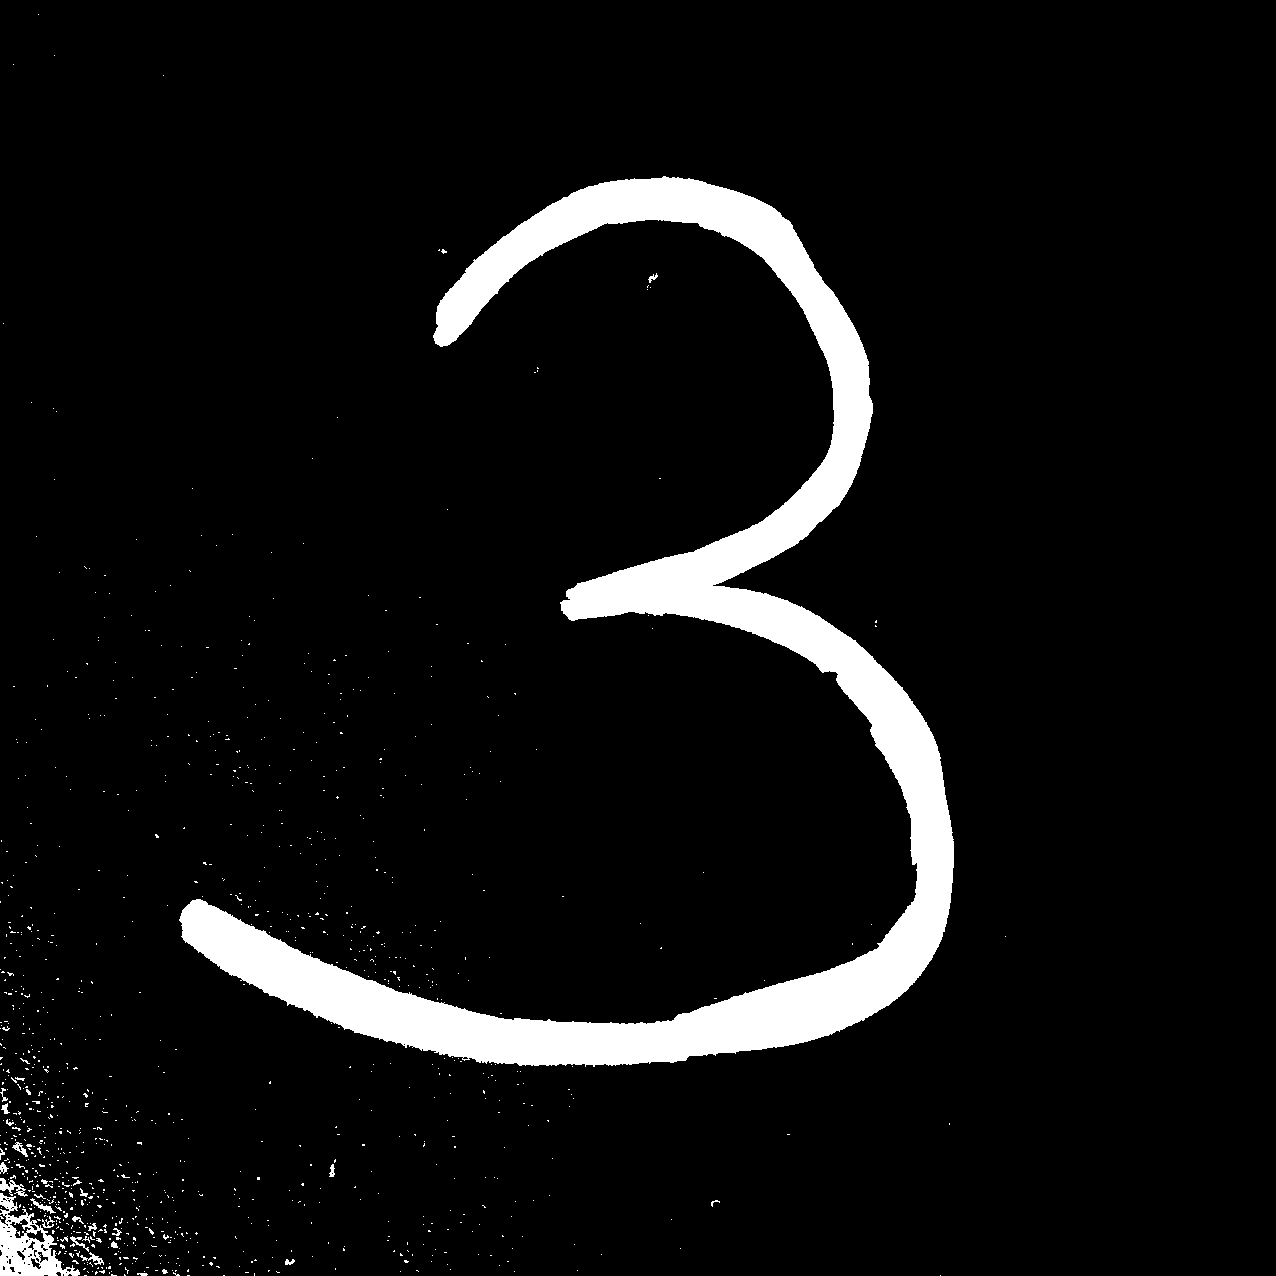

In [45]:
# инвертируем
three = PIL.ImageOps.invert(three)
three

In [59]:
# наконец меняем размер
three = three.resize([28,28])
three

In [62]:
# я не сразу учел, что нужно изменить формат изображения
# иначе массив выходит 28х28х3, а нужно 28х28х1
three = three.convert('L')
three

In [64]:
# преобразуем картинку в массив подходящий для нейронки
three = image.img_to_array(three)
three = three.reshape(1, 784)
three.shape

(1, 784)

In [67]:
# наконец предсказываем. Чертовски волнительно!
prediction = model.predict(three)
print(np.argmax(prediction))

3


# Ехухух!

Извините)

### Bonus

Это задание с февральского потока. Но мне понравилась идея. Наша задача найти те варианты, которые наша нейросеть не смогла определить и вообще удалить их из тренировочной выборки. Тестовую выборку мы конечно же оставляем как есть.

Гипотеза в том, что в обучающей выборке есть цифры, написанные очень “криво” и если мы удалим их, то точность на проверочной выборке улучшится.

In [91]:
# загрузим нашу модельку
# from tensorflow.keras.models import load_model
# model = load_model('mnist_number.h5')

Этот вариант не сработал. Я не учел, что наша нейросеть после 90 эпох знает тренировочную базу так, что выдает все 100% без всякого удаления)) Поэтому обучим новую нейросеть попроще. Сократим количество эпох.

In [113]:
model = Sequential()
model.add(Dense(800, input_dim = 784, activation='relu'))
model.add(Dense(100, activation='linear'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=768, epochs=3, verbose=1)
res_base = model.evaluate(x_test, y_test, verbose=1) # результат до эксперимента
res_test = model.evaluate(x_train, y_train) # проверяем, что на тренировочной выборке не 100%
print('res_test:', res_test[1])
res_base

Epoch 1/3
79/79 [==============================] - 7s 82ms/step - loss: 0.3873 - accuracy: 0.8872
Epoch 2/3
79/79 [==============================] - 7s 94ms/step - loss: 0.1428 - accuracy: 0.9591
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0659 - accuracy: 0.9808
res_test: 0.980816662311554


[0.08851230144500732, 0.972599983215332]

In [114]:
# предскажем саму тренировочную базу и заберем индексы не верных предсказаний
# наверное для этого есть более простой код
mi_error = [] # массив индексов ошибочных предсказаний
for num in range(len(x_train)):
    x = x_train[num]
    x = np.expand_dims(x, axis=0)
    prediction = model.predict(x)
    prediction = np.argmax(prediction)
    if prediction != y_train_org[num]:
        mi_error.append(num)

print(len(mi_error))
print(mi_error)

1151
[80, 132, 148, 172, 212, 224, 418, 494, 500, 547, 635, 670, 720, 778, 788, 854, 902, 916, 966, 1032, 1055, 1079, 1088, 1097, 1201, 1244, 1352, 1357, 1375, 1404, 1512, 1604, 1744, 1920, 1968, 2000, 2064, 2098, 2286, 2426, 2600, 2676, 2720, 2901, 2928, 2958, 3010, 3030, 3432, 3484, 3662, 3682, 3692, 3696, 3814, 3824, 3907, 4028, 4050, 4142, 4153, 4165, 4258, 4276, 4295, 4334, 4362, 4468, 4476, 4502, 4638, 4646, 4666, 4694, 4762, 4955, 5052, 5103, 5174, 5216, 5332, 5370, 5679, 5683, 5704, 5798, 5821, 5842, 5896, 5898, 5936, 6102, 6130, 6202, 6254, 6269, 6347, 6387, 6399, 6418, 6428, 6448, 6466, 6636, 6658, 6810, 6816, 6844, 6848, 6879, 6885, 6920, 7006, 7010, 7030, 7058, 7080, 7270, 7308, 7438, 7498, 7584, 7599, 7638, 7678, 7732, 7784, 7803, 7851, 7898, 7994, 8012, 8093, 8120, 8122, 8190, 8200, 8202, 8220, 8228, 8254, 8278, 8298, 8347, 8384, 8428, 8449, 8693, 8709, 8729, 8772, 8790, 8821, 8853, 8857, 8879, 8883, 8898, 8904, 8966, 9075, 9078, 9098, 9180, 9220, 9279, 9290, 9384, 9433, 

In [123]:
# удалим неверно опозннаные примеры из тренировочной выборки и проверим, что все верно
new_x_train = np.delete(x_train, mi_error, axis=0) 
new_y_train = np.delete(y_train, mi_error, axis=0)
res_chit = model.evaluate(new_x_train, new_y_train)
res_chit

1840/1840 [==============================] - 8s 4ms/step - loss: 0.0285 - accuracy: 1.0000


[0.028456274420022964, 1.0]

In [125]:
# вновь обучим нейронку на измененной выборке и проверим на тестовой
model = Sequential()
model.add(Dense(800, input_dim = 784, activation='relu'))
model.add(Dense(100, activation='linear'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(new_x_train, new_y_train, batch_size=768, epochs=3, verbose=1)
res_new = model.evaluate(x_test, y_test, verbose=1)
res_new

Epoch 1/3
77/77 [==============================] - 7s 90ms/step - loss: 0.3355 - accuracy: 0.9004
Epoch 2/3
77/77 [==============================] - 8s 98ms/step - loss: 0.0875 - accuracy: 0.9725
Epoch 3/3
313/313 [==============================] - 1s 5ms/step - loss: 0.1174 - accuracy: 0.9660


[0.11736825108528137, 0.9660000205039978]

#### Выводы.

Запустите следующую ячейку.

In [126]:
if res_base[1] < res_new[1]:
    print(f'Гипотеза улучшила результат на {res_new[1]-res_base[1]}. Мы молодцы! =))')
else:
    print('К сожалению эта интересная гипотеза оказалась ложной, или же я где-то допустил ошибку. Но гипотезы, это все равно весело =)')

К сожалению эта интересная гипотеза оказалась ложной, или же я где-то допустил ошибку. Но гипотезы, это все равно весело =)
